Generating synthetic clusters + SATELLITE DATA...

Dataset with satellite features created!


Cluster Summary:
 Cluster_Label
 0    590
 1    158
 2    150
-1     32
Name: count, dtype: int64

🧠 Silhouette Score: 0.7413



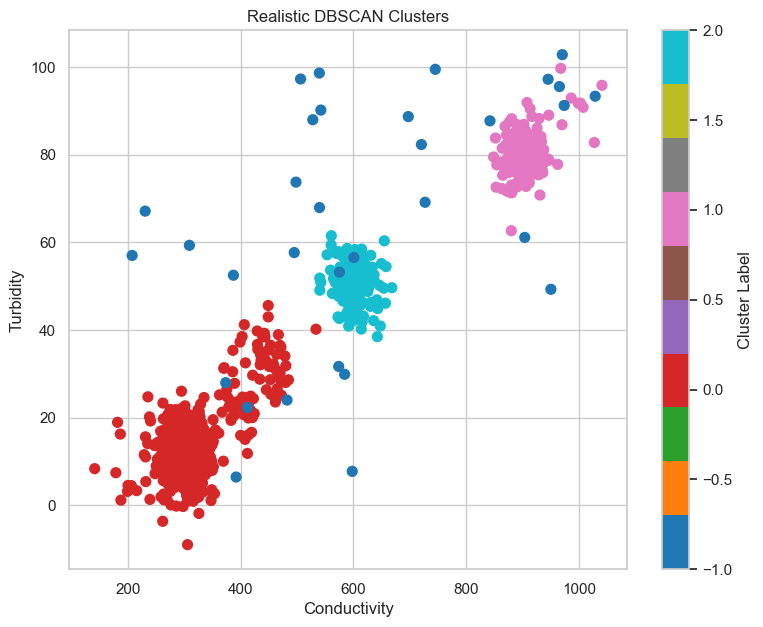

In [ ]:
"""
Dataset with SATELLITE FEATURES
"""

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns



def generate_realistic_clusters_with_satellite():
    print("synthetic clusters + SATELLITE DATA...")
    cluster_sizes = {
        "normal": 500,
        "chemical_large": 150,
        "thermal_large": 150,
        "agri_small": 40,
        "sewage_small": 40,
        "micro1": 10,
        "micro2": 10,
        "noise": 30
    }

    centers = {
        "normal":         [7.2, 8.0, 25, 12, 300, 2],
        "chemical_large": [4.8, 5.0, 27, 80, 900, 14],
        "thermal_large":  [6.2, 4.0, 39, 50, 600,  8],
        "agri_small":     [6.8, 7.0, 26, 22, 400, 10],
        "sewage_small":   [6.5, 6.0, 28, 35, 450, 12],
        "micro1":         [5.1, 3.0, 29, 90, 1000, 18],
        "micro2":         [7.8, 9.2, 23, 5,  200,  1],
    }

    data = []
    stations = list(range(1, 6))

    for cname, size in cluster_sizes.items():
        if cname == "noise":
            for _ in range(size):
                # Random environmental noise
                pH = np.random.uniform(4, 9)
                DO = np.random.uniform(3, 10)
                Temp = np.random.uniform(18, 40)
                Turbidity = np.random.uniform(5, 100)
                Cond = np.random.uniform(200, 1000)
                Nitrate = np.random.uniform(1, 15)

                # SATELLITE FEATURE SIMULATION
                NDWI = np.random.uniform(-0.2, 0.4)
                NDVI = np.random.uniform(-0.1, 0.5)
                SWIR = np.random.uniform(0.1, 0.6)
                NIR = np.random.uniform(0.2, 0.8)
                LST = Temp + np.random.uniform(-1, 1)
                TSS_est = Turbidity + np.random.uniform(-5, 5)
                Chlorophyll = np.random.uniform(1, 25)

                data.append([
                    "2025-01-01", f"Station_{np.random.randint(1,6)}",
                    pH, DO, Temp, Turbidity, Cond, Nitrate,
                    NDWI, NDVI, SWIR, NIR, LST, TSS_est, Chlorophyll
                ])

        else:
            center = centers[cname]

            for _ in range(size):
                pH, DO, Temp, Turbidity, Cond, Nitrate = np.random.normal(
                    loc=center, scale=[0.25, 0.35, 1.2, 5, 25, 1.3]
                )

                
                if "chemical" in cname:
                    NDWI = np.random.uniform(-0.1, 0.1)
                    NDVI = np.random.uniform(-0.05, 0.3)
                    SWIR = np.random.uniform(0.5, 0.9)   
                    NIR = np.random.uniform(0.2, 0.5)
                    Chlorophyll = np.random.uniform(2, 10)

                elif "thermal" in cname:
                    NDWI = np.random.uniform(0.0, 0.4)
                    NDVI = np.random.uniform(0.1, 0.4)
                    SWIR = np.random.uniform(0.3, 0.6)
                    NIR = np.random.uniform(0.3, 0.7)
                    Chlorophyll = np.random.uniform(1, 8)

                elif "agri" in cname:
                    NDWI = np.random.uniform(0.1, 0.3)
                    NDVI = np.random.uniform(0.3, 0.7) 
                    SWIR = np.random.uniform(0.2, 0.4)
                    NIR = np.random.uniform(0.4, 0.8)
                    Chlorophyll = np.random.uniform(10, 25)

                elif "sewage" in cname:
                    NDWI = np.random.uniform(0.0, 0.2)
                    NDVI = np.random.uniform(0.0, 0.3)
                    SWIR = np.random.uniform(0.4, 0.7)
                    NIR = np.random.uniform(0.3, 0.6)
                    Chlorophyll = np.random.uniform(15, 30)

                else:
                    # normal water
                    NDWI = np.random.uniform(0.2, 0.5)
                    NDVI = np.random.uniform(0.2, 0.7)
                    SWIR = np.random.uniform(0.1, 0.3)
                    NIR = np.random.uniform(0.3, 0.6)
                    Chlorophyll = np.random.uniform(2, 10)

                LST = Temp + np.random.uniform(-1, 1)       # close to temp
                TSS_est = Turbidity + np.random.uniform(-3, 3)

                data.append([
                    "2025-01-01", f"Station_{np.random.choice(stations)}",
                    pH, DO, Temp, Turbidity, Cond, Nitrate,
                    NDWI, NDVI, SWIR, NIR, LST, TSS_est, Chlorophyll
                ])

    df = pd.DataFrame(data, columns=[
        "Date_Time", "Station_ID",
        "pH", "DO", "Temperature", "Turbidity", "Conductivity", "Nitrate",
        "NDWI", "NDVI", "SWIR", "NIR", "LST", "TSS_est", "Chlorophyll"
    ])

    df.to_csv("RealisticSatelliteClusterData.csv", index=False)
    print("Realistic dataset with satellite features created!\n")

    return df



📁 Dataset Loaded: (930, 15)

🧩 Cluster Summary:
 Cluster_Label
 0    590
 1    158
 2    150
-1     32
Name: count, dtype: int64

🧠 Silhouette Score: 0.7413


🏷 AUTO LABEL SUMMARY:
 Auto_Label
Normal Water            590
Chemical Pollution      158
Unknown / Mixed Type    150
Noise / Outliers         32
Name: count, dtype: int64 



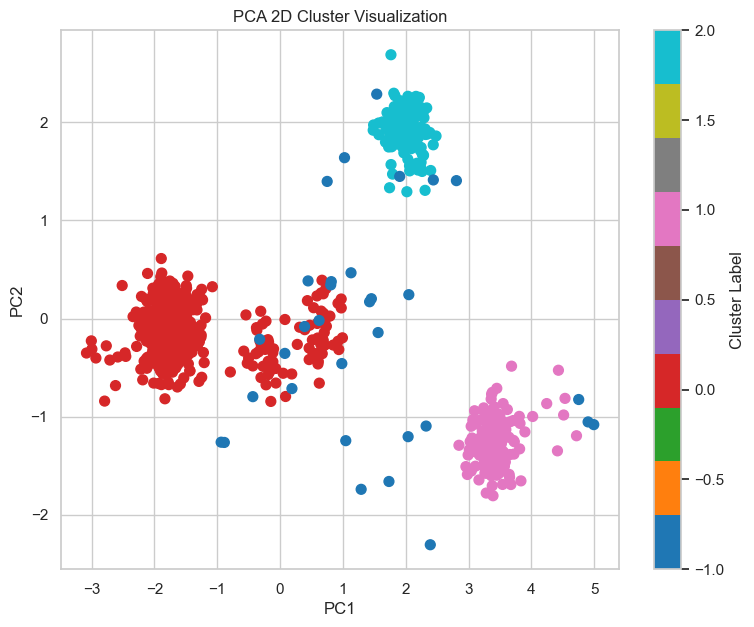

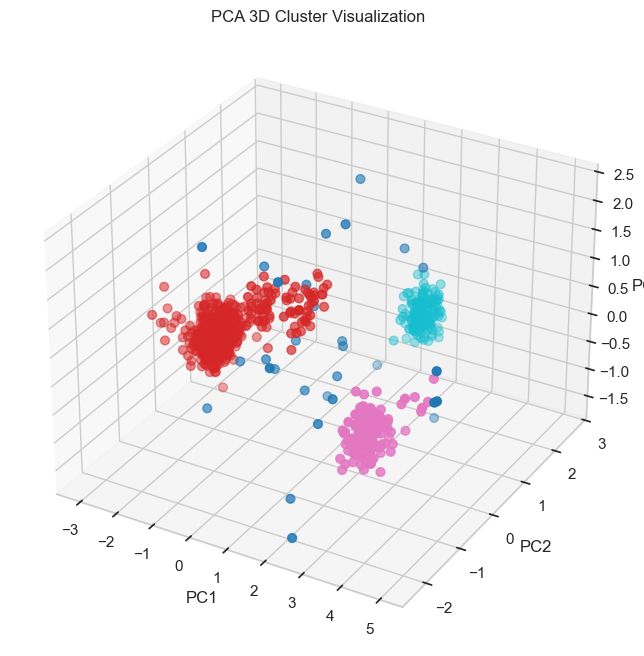

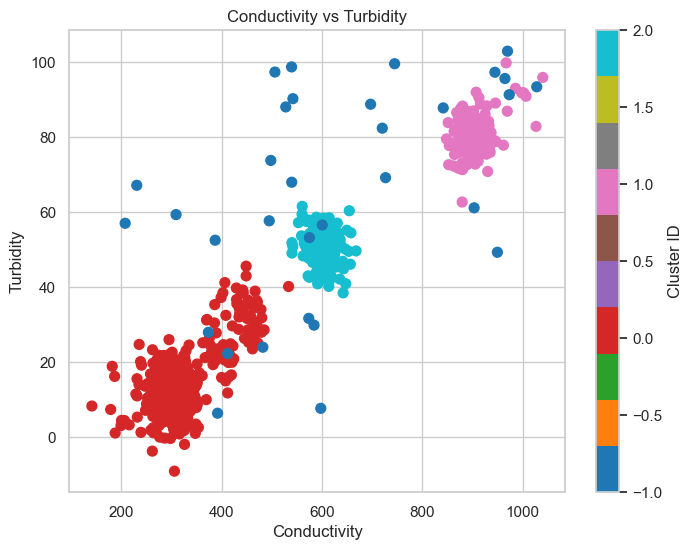

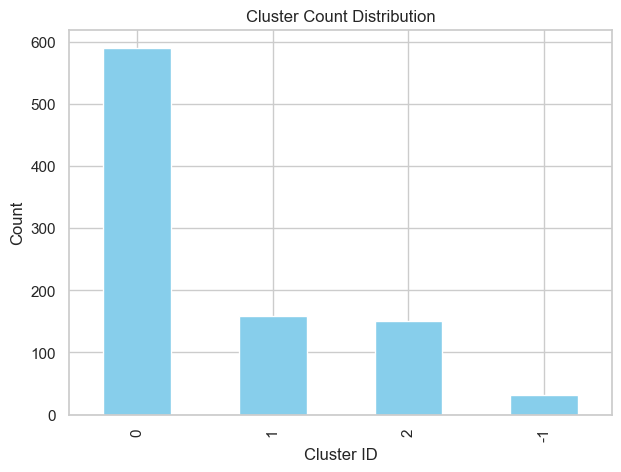

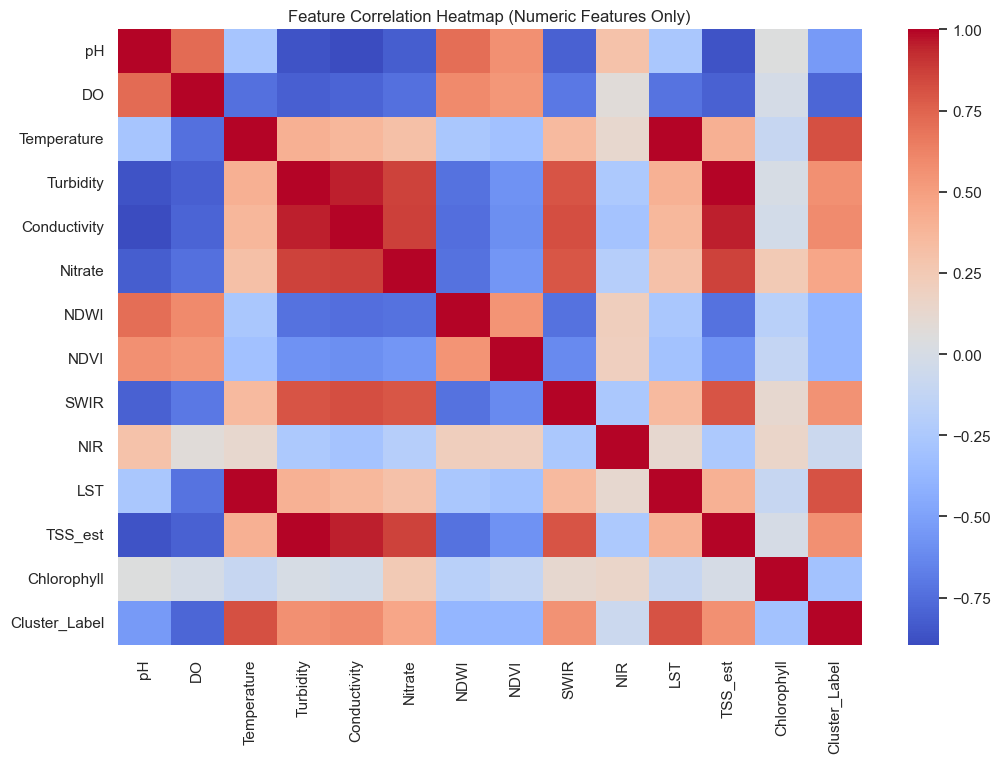


✅ Analysis Completed Successfully!



In [45]:
"""
ANALYSIS SCRIPT FOR REALISTIC + SATELLITE DATASET
"""

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D



def load_dataset():
    df = pd.read_csv("RealisticSatelliteClusterData.csv")
    print("📁 Dataset Loaded:", df.shape)
    return df


def run_dbscan(df):
    features = df[["pH", "DO", "Temperature", "Turbidity", "Conductivity", "Nitrate"]]

    X = StandardScaler().fit_transform(features)

    db = DBSCAN(eps=0.9, min_samples=12)
    labels = db.fit_predict(X)

    df["Cluster_Label"] = labels
    print("\n🧩 Cluster Summary:\n", df["Cluster_Label"].value_counts())

    return df, X, labels


def compute_silhouette(X, labels):
    mask = labels != -1
    X_clean = X[mask]
    labels_clean = labels[mask]

    if len(set(labels_clean)) > 1:
        score = silhouette_score(X_clean, labels_clean)
        print(f"\n🧠 Silhouette Score: {score:.4f}\n")
    else:
        print("\nNot enough clusters for silhouette score.\n")


def auto_label_clusters(df):
    cluster_labels = {}

    for c in df["Cluster_Label"].unique():
        if c == -1:
            cluster_labels[c] = "Noise / Outliers"
            continue

        sub = df[df["Cluster_Label"] == c]
        avg_turb = sub["Turbidity"].mean()
        avg_cond = sub["Conductivity"].mean()
        avg_nitrate = sub["Nitrate"].mean()
        if avg_cond > 800:
            cluster_labels[c] = "Chemical Pollution"
        elif avg_turb > 60:
            cluster_labels[c] = "Severe Contamination"
        elif avg_nitrate > 12:
            cluster_labels[c] = "Agricultural Runoff"
        elif avg_turb < 20 and avg_cond < 400:
            cluster_labels[c] = "Normal Water"
        else:
            cluster_labels[c] = "Unknown / Mixed Type"

    df["Auto_Label"] = df["Cluster_Label"].map(cluster_labels)

    print("\n🏷 AUTO LABEL SUMMARY:\n", df["Auto_Label"].value_counts(), "\n")
    return df


def pca_2d(X, labels):
    pca = PCA(n_components=2)
    comp = pca.fit_transform(X)
    plt.figure(figsize=(9, 7))
    plt.scatter(comp[:, 0], comp[:, 1], c=labels, cmap="tab10", s=50)
    plt.title("PCA 2D Cluster Visualization")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.colorbar(label="Cluster Label")
    plt.show()


def pca_3d(X, labels):
    pca = PCA(n_components=3)
    comp = pca.fit_transform(X)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(comp[:, 0], comp[:, 1], comp[:, 2], c=labels, cmap="tab10", s=40)
    ax.set_title("PCA 3D Cluster Visualization")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

    plt.show()


def turbidity_conductivity_plot(df):
    plt.figure(figsize=(8, 6))
    plt.scatter(df["Conductivity"], df["Turbidity"], c=df["Cluster_Label"], cmap="tab10", s=50)
    plt.xlabel("Conductivity")
    plt.ylabel("Turbidity")
    plt.title("Conductivity vs Turbidity")
    plt.colorbar(label="Cluster ID")
    plt.show()


def cluster_count_bar(df):
    plt.figure(figsize=(7, 5))
    df["Cluster_Label"].value_counts().plot(kind="bar", color="skyblue")
    plt.title("Cluster Count Distribution")
    plt.xlabel("Cluster ID")
    plt.ylabel("Count")
    plt.show()


def heatmap(df):
    plt.figure(figsize=(12, 8))
    numeric_df = df.select_dtypes(include=[np.number])
    sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
    plt.title("Feature Correlation Heatmap (Numeric Features Only)")
    plt.show()


if __name__ == "__main__":
    df = load_dataset()
    df, X, labels = run_dbscan(df)

    compute_silhouette(X, labels)

    df = auto_label_clusters(df)

    # Visualizations
    pca_2d(X, labels)
    pca_3d(X, labels)
    turbidity_conductivity_plot(df)
    cluster_count_bar(df)
    heatmap(df)
